# 1. Import the necessary libraries.

In [1]:
import  numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the csv to a dataframe

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

# 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

# 4. Rename the columns so they follow the PE8

In [6]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
customer_df.columns = cols
cols = []
for column in customer_df.columns:
    cols.append(column.replace(' ','_'))
customer_df.columns = cols

customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

# 5. Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(pd.to_datetime)
customer_df.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


# 6. Define a function that differentiates between continuous and discrete variables. 
Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
# From this point on it seems we are only interested in the numerical data
customer_df_num = customer_df.select_dtypes(['number'])

In [9]:
# First we check how many unique values there are for each column
for i in customer_df_num.columns:
    print(str(i) + '  ' + str(len(customer_df_num[i].unique())))

customer_lifetime_value  8041
income  5694
monthly_premium_auto  202
months_since_last_claim  36
months_since_policy_inception  100
number_of_open_complaints  6
number_of_policies  9
total_claim_amount  5106


In [10]:
# We assume that everything, that has more than 20 different values is continous data.
discrete_cols = []
conti_cols = []
# With this function we check if a column of our dataframe has more than 20 unique values and append
# the name of the column to the corresponding list
def iscontinous(column):
    if len(customer_df_num[column].unique()) > 20:
        conti_cols.append(column)
    else:
        discrete_cols.append(column)

In [11]:
# We apply the function to all the columns of the dataframe
for col in customer_df_num.columns:
    iscontinous(col)

In [12]:
# We create new dataframes for discrete and continous data with the lists
cont_data = customer_df_num[conti_cols]
disc_data = customer_df_num[discrete_cols]

In [13]:
# checking the result
display(cont_data.head(2))
display(disc_data.head(2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8


# 7. Plot a correlation matrix, comment what you see.

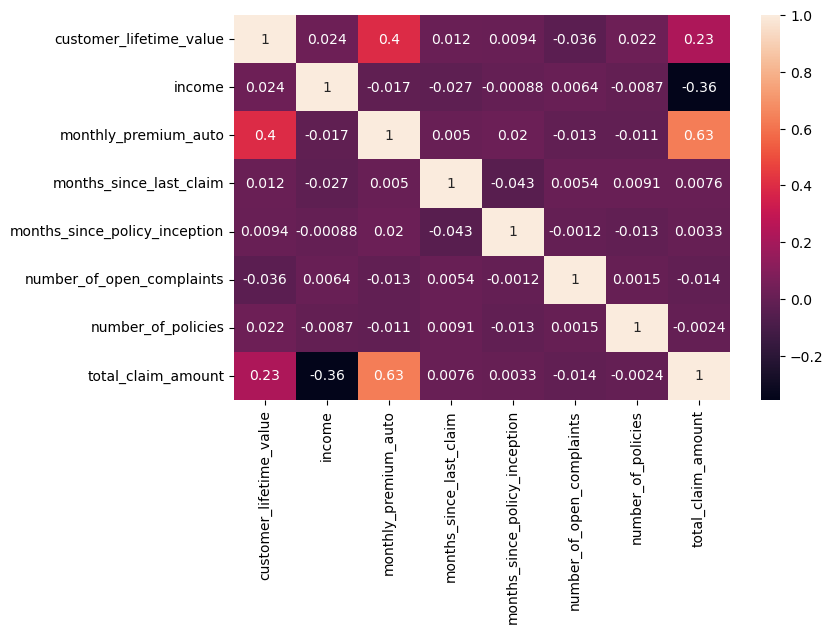

In [14]:
# creating a correlation matrix
correlations_matrix = customer_df_num.corr()
# create a heatmap of it
plt.figure(figsize = (8,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

We have the highest correlation between monthly_premium_auto and total_claim_amount. There is no obvious multicolinearity or anything else standing out.

# 8. Create a function to plot every discrete variable. Do the same with the continuous variables 
# 9. Comment what you can see in the plots.
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [15]:
# Function for discrete data
def c_plt_all(df):
    for c in df.columns:
        sns.countplot(x=c, data=df)
        plt.show()

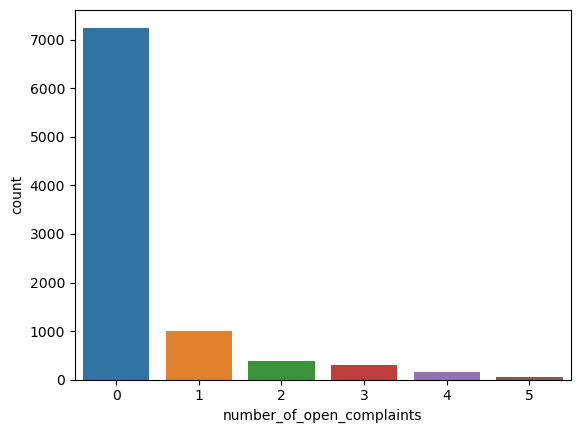

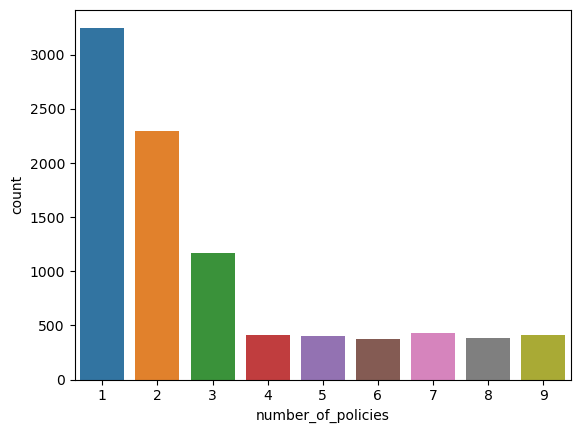

In [16]:
# simple countplot for number of occurances
c_plt_all(disc_data)

We see nothing out of the ordinary for our discrete values, although you could argue that if they continue to expand on unique values in time they could also be seen as continous data. In that case we would be left with categorical values as discrete data.

In [17]:
# Function for continous data
def c_plt_all2(df):
    for c in df.columns:
        sns.histplot(x=c, data=df)
        plt.show()

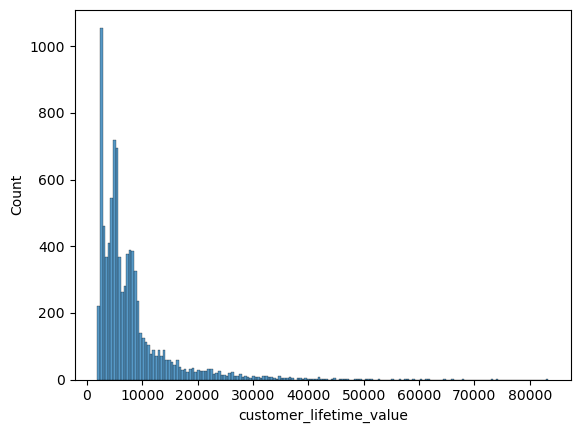

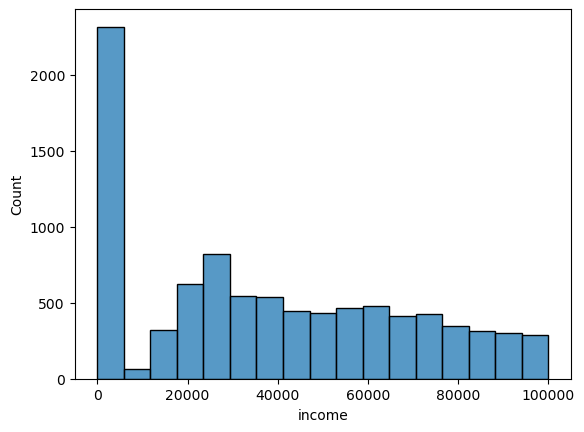

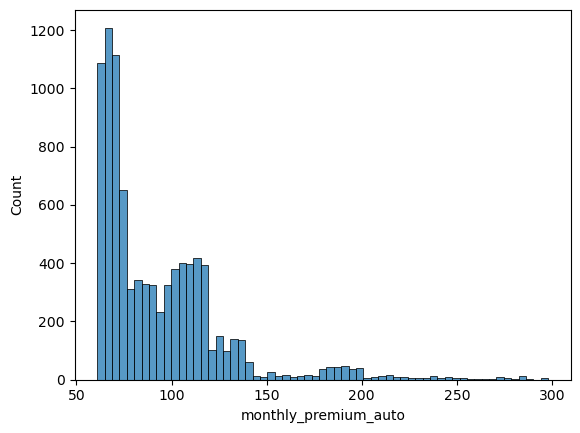

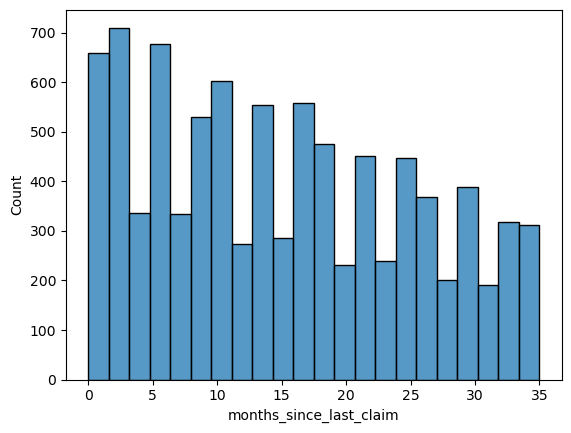

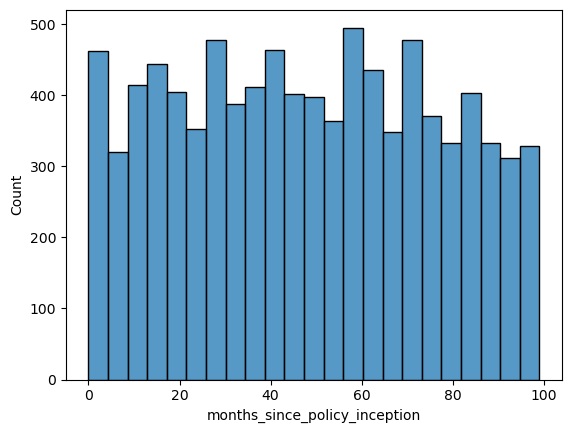

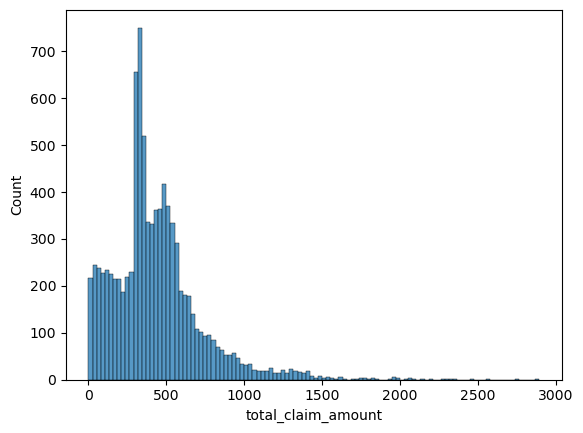

In [18]:
c_plt_all2(cont_data)

In the plot for customer lifetime value we can see a skew to the left. When building a model apllying a log transform would be advised due to the high range in values.

For the income we see a lot of outliers at 0 value.

In total claim amount we have a high peak around the 250/300 values which stands out, I can not think of an explanation for that.

# 10. Look for outliers in the continuous variables.
# 11. Did you find outliers? Comment what you will do with them.
(HINT: There’s a good plot to do that!)

In [19]:
len(cont_data[cont_data['customer_lifetime_value'] > 6500])

4101

We can see outliers above the 6500 mark for customer_lifetime_value.
We can see outliers above the 2500 mark for total_claim_amount.
A lot of 0 values for income don't make sense and can also be seen as outliers.

For customer_lifetime_value we would bring the outliers down with the log transformation.

In [20]:
len(cont_data[cont_data['total_claim_amount'] > 2500])

3

The outliers in total_claim_amount are just 3 rows, we can afford to drop them.

In [21]:
len(cont_data[cont_data['income'] == 0])

2317

The 0 values for income are a problem, they are 2317 rows. We could either replace them with the mean value or  build a linear regression model and replace them with sensible values from the prediction.

# 12. Check all columns for NaN values. 
Decide what (if anything) you will need to do with them.

In [22]:
# There are no NaN values in our dataset.
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64